# Henry Ezeanowi - 8900446
# Lab 9

In [69]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with

Loading the MNIST dataset and exploring the train and test dataset

In [70]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


70000 images in the fashion MNIST dataset, 60000 images training set and 10000 images test set

Labels of the first 15 images in the training set

In [71]:
print(f'Label: {train_labels[0:15]}')

Label: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7]


Grayscale of the first 15 images in the training set

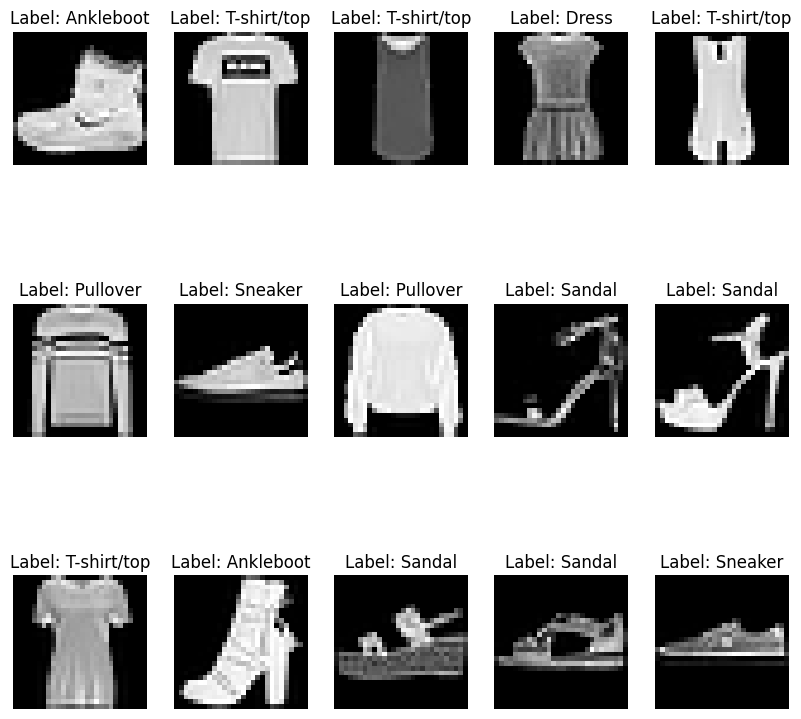

In [72]:
label_description = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankleboot"
}

plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(train_images[i], cmap = 'gray')
    plt.title(f"Label: {label_description[train_labels[i]]}")
    plt.axis('off')
plt.show()


Labels of the first 10 images in the test set

In [88]:
print(f'Label: {test_labels[0:10]}')

Label: [9 2 1 1 6 1 4 6 5 7]


Grayscale of the first 10 images in the testing set

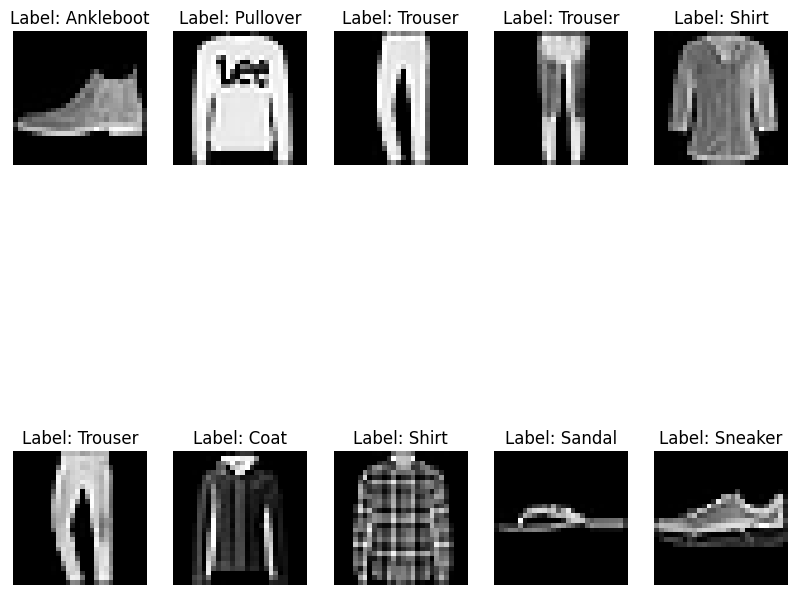

In [73]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Label: {label_description[test_labels[i]]}")
    plt.axis('off')
plt.show()

Preprocessing the data and normalizing it to 0 and 1

In [74]:
# Flattening the 28x28 image into a 1-dimensional array dim=1 (784,) vector 

train_images = train_images.reshape((60000, 28 * 28))  
test_images = test_images.reshape((10000, 28 * 28))

# Normalizing the data to the range [0,1] by min-max range, and casting it to float32

train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255

In [75]:
print('Train Images:')
print(train_images)
print('Test Images:')
print(test_images)

Train Images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test Images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Train a dense neural network using Keras

In [76]:
# Build the model

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.5608 - accuracy: 0.8009
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3862 - accuracy: 0.8574
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3415 - accuracy: 0.8737
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3151 - accuracy: 0.8844
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2963 - accuracy: 0.8906


In [89]:
# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Using the first image in the test data

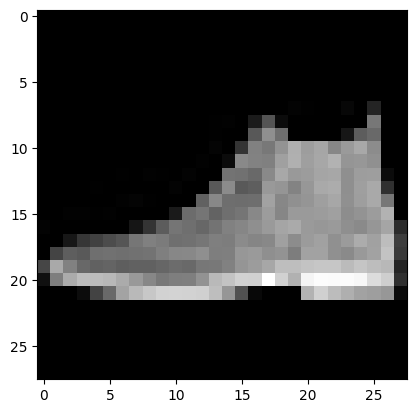

In [78]:
plt.imshow(test_images[0].reshape(28,28), cmap='gray')

Reshape the test image to (1, 784) since it is a 1d array

In [79]:
print(test_images[0:1].shape)

(1, 784)


Predicting the first image

In [80]:
prediction = model.predict(test_images[0: 1])
prediction

1/1 [==============================] - 0s 128ms/step


array([[1.5685107e-06, 3.1599191e-07, 1.1271144e-07, 3.2306988e-07,
        4.5184868e-07, 8.2278196e-03, 4.1220073e-07, 3.4213732e-03,
        5.4090324e-06, 9.8834223e-01]], dtype=float32)

In [81]:
prediction.argmax() 

9

In [82]:
prediction[0,9]

0.9883422

Label 9 has the highest prediction probability of 98.83%

In [83]:
# Predicting the output for all test data

y_test_pred = model.predict(test_images)
print(y_test_pred)

# Display the prediction labels

y_pred_labels = np.argmax(y_test_pred, axis=1)
print("The model prediction labels are: ", y_pred_labels)

313/313 [==============================] - 1s 4ms/step
[[1.5685079e-06 3.1599191e-07 1.1271123e-07 ... 3.4213767e-03
  5.4090378e-06 9.8834223e-01]
 [2.7607376e-04 4.3294404e-10 9.9714381e-01 ... 1.8297047e-09
  1.1782329e-07 1.7607916e-09]
 [2.8877619e-08 1.0000000e+00 1.7929853e-10 ... 9.3481321e-14
  6.6077880e-14 2.0327879e-14]
 ...
 [1.8923148e-03 6.6864305e-09 4.5074761e-04 ... 8.2352863e-06
  9.9458188e-01 2.4078576e-08]
 [1.8464144e-07 9.9992967e-01 3.5872972e-08 ... 6.2597261e-09
  1.5744898e-09 1.5229112e-08]
 [1.0991850e-04 1.7141540e-05 9.4543364e-05 ... 2.2561459e-03
  4.1147033e-04 3.2021559e-05]]
The model prediction labels are:  [9 2 1 ... 8 1 5]


### Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration

Model Accuracy

In [84]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test_accuracy: {test_accuracy}")

313/313 [==============================] - 2s 4ms/step - loss: 0.3645 - accuracy: 0.8652
Test_accuracy: 0.8651999831199646


Accuracy of the model is 86.52%

Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(test_labels, y_pred_labels)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[805   2   5  17   2   2 164   0   3   0]
 [  2 973   0  19   2   0   4   0   0   0]
 [ 21   0 722  11 101   1 144   0   0   0]
 [ 32  20   8 888  11   1  39   0   1   0]
 [  0   1  77  56 728   0 138   0   0   0]
 [  0   0   0   0   0 986   0  10   0   4]
 [110   2  58  24  32   0 771   0   3   0]
 [  0   0   0   0   0  71   0 875   0  54]
 [ 12   0   1   6   1   5  22   3 950   0]
 [  0   0   0   0   0  25   1  20   0 954]]


Using the 8th row, 875 test images were correctly predicted as label 7. However, 71 images were misinterpreted as label 5, 54 images was identified as label 9. Hence, though there are significant correct prediction in all the classes, there are some misinterpretyed predictions by the model in each class. Further optimization may be necessary to improve the model performance. We can view the misalignement in actual versus predicted labels below

In [86]:
incorrect_indices = np.where(test_labels != y_pred_labels)
print('Total number of incorrect indices:', len(incorrect_indices[0]))
num_examples_to_explore = 5

# Example of how to explore incorrect predictions
for i in range(num_examples_to_explore):
    index = incorrect_indices[0][i]
    true_label = test_labels[index]
    predicted_label = y_pred_labels[index]
    print(f"Incorrect Example {i + 1}:")
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)

Total number of incorrect indices: 1348
Incorrect Example 1:
True Label: 7
Predicted Label: 5
Incorrect Example 2:
True Label: 4
Predicted Label: 2
Incorrect Example 3:
True Label: 9
Predicted Label: 5
Incorrect Example 4:
True Label: 4
Predicted Label: 2
Incorrect Example 5:
True Label: 3
Predicted Label: 6


Other perfofrmance metrics

In [87]:
from sklearn.metrics import classification_report

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print("Classification Report:")
print(classification_report(test_labels, y_pred_labels, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.81      0.81      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.83      0.72      0.77      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.83      0.73      0.78      1000
      Sandal       0.90      0.99      0.94      1000
       Shirt       0.60      0.77      0.68      1000
     Sneaker       0.96      0.88      0.92      1000
         Bag       0.99      0.95      0.97      1000
  Ankle boot       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



The model has high precision and recall for classes such as Trouser, Sandal, Bag, and Ankle boot 

The Pullover and Shirt classes have lower precision and recall, indicating the models sub-optimal performance in predicting these.

The macro-average F1-score, which gives equal weight to each class, is 0.87, indicating a considerable performance.